In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale

# load iris dataset
iris = datasets.load_iris()

X = scale(iris.data)
y = iris.target

# apply PCA
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(X)

#### Loadings

In [7]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=iris.feature_names)
loadings

,PC1,PC2
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


#### Loading plot

In [8]:
def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.05, head_length = 0.05, color = '#21918C',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = '#21918C', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()

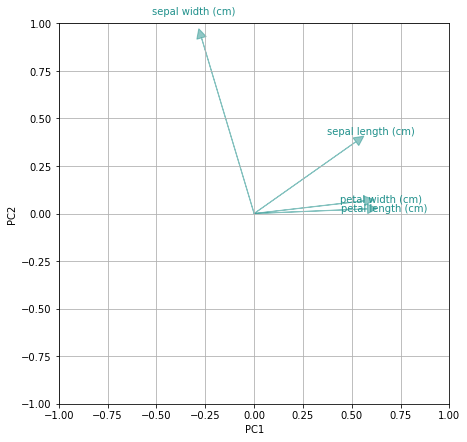

In [9]:
fig, ax = plt.subplots(figsize = (7,7))
loading_plot(pca.components_.T, iris.feature_names)

#### Loading matrix

In [5]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# for the dimension of the matrix look at the picture above

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=iris.feature_names)
loading_matrix

,PC1,PC2
sepal length (cm),0.893151,0.362039
sepal width (cm),-0.461684,0.885673
petal length (cm),0.994877,0.023494
petal width (cm),0.968212,0.064214
